In [58]:
!pip install python-whois


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
import pandas as pd
import itertools
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import math
from collections import Counter
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import os
import socket
import whois
from datetime import datetime
import time
from bs4 import BeautifulSoup
import urllib
import bs4
import os
for dirname, _, filenames in os.walk("/content/drive/MyDrive/Colab Notebooks/malicious_phish.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [60]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IT352_dataset.csv')

print(df.shape)
df.head()

(282333, 2)


,url,type
0,metacafe.com/watch/6187450/montreal_expos_1994...,benign
1,hbs.edu/news/school/,benign
2,twitter.com/heavymtl,benign
3,klout.com/egrissom,benign
4,modem-drivers.com/companies/352.htm,benign


In [61]:
df.type.value_counts()

benign      188222
phishing     94111
Name: type, dtype: int64

In [62]:
import re

def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

In [63]:
print(df['url'].dtype)

object


In [64]:
df['url'] = df['url'].astype(str)

In [65]:
from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [66]:
!pip install googlesearch-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
df['count.'] = df['url'].apply(lambda i: i.count('.'))
df.head()

,url,type,use_of_ip,abnormal_url,count.
0,metacafe.com/watch/6187450/montreal_expos_1994...,benign,0,0,1
1,hbs.edu/news/school/,benign,0,0,1
2,twitter.com/heavymtl,benign,0,0,1
3,klout.com/egrissom,benign,0,0,1
4,modem-drivers.com/companies/352.htm,benign,0,0,2


In [68]:
df['count-www'] = df['url'].apply(lambda i: i.count('www'))
df['count@'] = df['url'].apply(lambda i: i.count('@'))
from urllib.parse import urlparse
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')
df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

In [69]:
df['count-https'] = df['url'].apply(lambda i : i.count('https'))
df['count-http'] = df['url'].apply(lambda i : i.count('http'))

In [70]:
df['count%'] = df['url'].apply(lambda i: i.count('%'))
df['count?'] = df['url'].apply(lambda i: i.count('?'))
df['count-'] = df['url'].apply(lambda i: i.count('-'))
df['count='] = df['url'].apply(lambda i: i.count('='))
#Length of URL
df['url_length'] = df['url'].apply(lambda i: len(str(i)))
#Hostname Length
df['hostname_length'] = df['url'].apply(lambda i: len(urlparse(i).netloc))
df.head()

,url,type,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length
0,metacafe.com/watch/6187450/montreal_expos_1994...,benign,0,0,1,0,0,4,0,0,0,0,0,0,0,0,61,0
1,hbs.edu/news/school/,benign,0,0,1,0,0,3,0,0,0,0,0,0,0,0,20,0
2,twitter.com/heavymtl,benign,0,0,1,0,0,1,0,0,0,0,0,0,0,0,20,0
3,klout.com/egrissom,benign,0,0,1,0,0,1,0,1,0,0,0,0,0,0,18,0
4,modem-drivers.com/companies/352.htm,benign,0,0,2,0,0,2,0,0,0,0,0,0,1,0,35,0


In [71]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))

In [72]:
df.head()

,url,type,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url
0,metacafe.com/watch/6187450/montreal_expos_1994...,benign,0,0,1,0,0,4,0,0,0,0,0,0,0,0,61,0,0
1,hbs.edu/news/school/,benign,0,0,1,0,0,3,0,0,0,0,0,0,0,0,20,0,0
2,twitter.com/heavymtl,benign,0,0,1,0,0,1,0,0,0,0,0,0,0,0,20,0,0
3,klout.com/egrissom,benign,0,0,1,0,0,1,0,1,0,0,0,0,0,0,18,0,0
4,modem-drivers.com/companies/352.htm,benign,0,0,2,0,0,2,0,0,0,0,0,0,1,0,35,0,0


In [73]:
!pip install tld

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
#Importing dependencies
from urllib.parse import urlparse
from tld import get_tld
import os.path

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

In [75]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df['count-digits']= df['url'].apply(lambda i: digit_count(i))

In [76]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
df['count-letters']= df['url'].apply(lambda i: letter_count(i))

In [77]:
df = df.drop("tld",1)

<ipython-input-77-beaedf415f7f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("tld",1)


In [78]:
df.head()

,url,type,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,...,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count-digits,count-letters
0,metacafe.com/watch/6187450/montreal_expos_1994...,benign,0,0,1,0,0,4,0,0,...,0,0,0,61,0,0,5,-1,11,41
1,hbs.edu/news/school/,benign,0,0,1,0,0,3,0,0,...,0,0,0,20,0,0,4,-1,0,16
2,twitter.com/heavymtl,benign,0,0,1,0,0,1,0,0,...,0,0,0,20,0,0,8,-1,0,18
3,klout.com/egrissom,benign,0,0,1,0,0,1,0,1,...,0,0,0,18,0,0,8,-1,0,16
4,modem-drivers.com/companies/352.htm,benign,0,0,2,0,0,2,0,0,...,0,1,0,35,0,0,9,-1,3,27


In [79]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
df["type_code"].value_counts()

0    188222
1     94111
Name: type_code, dtype: int64

In [80]:
df.shape


(282333, 24)

In [81]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



# Compute correlation matrix
corr = df.corr()
corr


<ipython-input-81-cab87082b007>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,...,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count-digits,count-letters,type_code
use_of_ip,1.000000,0.079232,0.059946,0.001282,0.003821,0.021519,0.000810,-0.009900,0.005546,0.074099,...,-0.011395,0.012944,0.022851,0.045472,0.040199,0.000691,-0.010426,0.047666,0.007467,0.044400
abnormal_url,0.079232,1.000000,0.124529,0.014749,0.090325,0.240461,0.033373,0.026717,0.405417,0.947226,...,0.238381,0.157511,0.385286,0.808862,0.151716,0.100833,0.899430,0.238682,0.352340,0.243439
count.,0.059946,0.124529,1.000000,0.320416,0.060220,0.094073,0.020083,0.048049,0.068692,0.175234,...,-0.070099,0.217290,0.391193,0.253119,0.349236,0.181612,0.138527,0.292172,0.376900,0.169021
count-www,0.001282,0.014749,0.320416,1.000000,0.005244,0.112346,0.026991,0.004398,0.000826,0.041046,...,-0.140260,0.011031,-0.003922,0.036573,0.105053,-0.001204,0.011126,-0.033086,-0.001068,0.452991
count@,0.003821,0.090325,0.060220,0.005244,1.000000,0.038202,0.014653,0.017806,0.112504,0.084791,...,0.010823,0.066437,0.078292,0.075848,0.026327,0.022565,0.115377,0.031687,0.078374,0.041782
count_dir,0.021519,0.240461,0.094073,0.112346,0.038202,1.000000,0.075755,0.011068,0.064231,0.215902,...,0.238679,0.014214,0.419491,0.163293,0.104731,-0.009286,0.207766,0.247676,0.414715,-0.133555
count_embed_domian,0.000810,0.033373,0.020083,0.026991,0.014653,0.075755,1.000000,-0.001081,0.022839,0.043182,...,-0.005819,0.000681,0.019177,0.028886,0.010879,-0.019003,0.029175,-0.001835,0.022570,0.000293
short_url,-0.009900,0.026717,0.048049,0.004398,0.017806,0.011068,-0.001081,1.000000,0.061516,0.028823,...,0.052497,0.008298,0.044618,0.034271,-0.007542,-0.030627,0.072070,0.017817,0.050294,0.006217
count-https,0.005546,0.405417,0.068692,0.000826,0.112504,0.064231,0.022839,0.061516,1.000000,0.434949,...,0.013946,0.118601,0.178608,0.355349,0.088998,-0.007756,0.416257,0.117160,0.173864,0.195279
count-http,0.074099,0.947226,0.175234,0.041046,0.084791,0.215902,0.043182,0.028823,0.434949,1.000000,...,0.211830,0.193224,0.406403,0.757609,0.188559,0.085448,0.849060,0.245017,0.369718,0.231590


In [82]:
dataframe=df

In [83]:
df.to_csv('phis2.csv', index=False)

In [84]:
df=df.drop(['url','type'],axis=1)

In [85]:
df.dtypes

use_of_ip             int64
abnormal_url          int64
count.                int64
count-www             int64
count@                int64
count_dir             int64
count_embed_domian    int64
short_url             int64
count-https           int64
count-http            int64
count%                int64
count?                int64
count-                int64
count=                int64
url_length            int64
hostname_length       int64
sus_url               int64
fd_length             int64
tld_length            int64
count-digits          int64
count-letters         int64
type_code             int64
dtype: object

In [86]:
data=df

In [87]:
data.dtypes

use_of_ip             int64
abnormal_url          int64
count.                int64
count-www             int64
count@                int64
count_dir             int64
count_embed_domian    int64
short_url             int64
count-https           int64
count-http            int64
count%                int64
count?                int64
count-                int64
count=                int64
url_length            int64
hostname_length       int64
sus_url               int64
fd_length             int64
tld_length            int64
count-digits          int64
count-letters         int64
type_code             int64
dtype: object

In [88]:
data.shape

(282333, 22)

In [89]:
data.head()

,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,...,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count-digits,count-letters,type_code
0,0,0,1,0,0,4,0,0,0,0,...,0,0,61,0,0,5,-1,11,41,0
1,0,0,1,0,0,3,0,0,0,0,...,0,0,20,0,0,4,-1,0,16,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,20,0,0,8,-1,0,18,0
3,0,0,1,0,0,1,0,1,0,0,...,0,0,18,0,0,8,-1,0,16,0
4,0,0,2,0,0,2,0,0,0,0,...,1,0,35,0,0,9,-1,3,27,0


LSTM

In [91]:
from sklearn.model_selection import train_test_split
X =data.copy()

y = X.pop('type_code')
#X = data.drop(columns=['url','target','nb_underscore','nb_or','sfh','punycode'])
X = np.asarray(data.drop(columns=['type_code']))


# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)
X_train = np.expand_dims(X_train, axis=2)
X_valid = np.expand_dims(X_valid, axis=2)

input_shape = [X_train[1].shape]
print("Input shape is ", input_shape)

print(X_train.shape)
print(X_train)

Input shape is  [(21, 1)]
(211749, 21, 1)
[[[ 0]
  [ 1]
  [ 3]
  ...
  [12]
  [ 1]
  [37]]

 [[ 0]
  [ 0]
  [ 3]
  ...
  [-1]
  [ 0]
  [38]]

 [[ 0]
  [ 1]
  [ 2]
  ...
  [12]
  [ 0]
  [33]]

 ...

 [[ 0]
  [ 1]
  [ 2]
  ...
  [ 3]
  [ 1]
  [47]]

 [[ 0]
  [ 0]
  [ 2]
  ...
  [-1]
  [ 0]
  [37]]

 [[ 0]
  [ 0]
  [ 1]
  ...
  [-1]
  [ 4]
  [25]]]


In [92]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE: define the model given in the diagram
model = keras.Sequential([
    layers.BatchNormalization(input_shape=(21, 1)),
    layers.Conv1D(filters=64,kernel_size=7,activation='relu'),
    layers.BatchNormalization(),
    #layers.Conv1D(filters=32,kernel_size=3,activation='relu'),
    #layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2) ,
    layers.Dropout(0.3),
    
    layers.LSTM(100),
    layers.Dropout(0.3),
    layers.Flatten(), # flatten out the layers
    layers.Dense(512,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_4 (Batc  (None, 21, 1)            4         
 hNormalization)                                                 
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 64)            512       
                                                                 
 batch_normalization_5 (Batc  (None, 15, 64)           256       
 hNormalization)                                                 
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 7, 64)            0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 7, 64)             0         
                                                      

In [93]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [94]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.0001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=30,
    callbacks=[early_stopping],
)

Epoch 1/30
414/414 [==============================] - 53s 119ms/step - loss: 0.4665 - binary_accuracy: 0.7716 - val_loss: 0.4168 - val_binary_accuracy: 0.7929
Epoch 2/30
414/414 [==============================] - 51s 123ms/step - loss: 0.2593 - binary_accuracy: 0.9022 - val_loss: 0.2382 - val_binary_accuracy: 0.9148
Epoch 3/30
414/414 [==============================] - 51s 122ms/step - loss: 0.2147 - binary_accuracy: 0.9192 - val_loss: 0.1873 - val_binary_accuracy: 0.9299
Epoch 4/30
414/414 [==============================] - 50s 122ms/step - loss: 0.2039 - binary_accuracy: 0.9242 - val_loss: 0.2221 - val_binary_accuracy: 0.9187
Epoch 5/30
414/414 [==============================] - 56s 134ms/step - loss: 0.1985 - binary_accuracy: 0.9270 - val_loss: 0.1842 - val_binary_accuracy: 0.9325
Epoch 6/30
414/414 [==============================] - 50s 122ms/step - loss: 0.1904 - binary_accuracy: 0.9298 - val_loss: 0.2512 - val_binary_accuracy: 0.9040
Epoch 7/30
414/414 [==========================

Best Validation Loss: 0.1442
Best Validation Accuracy: 0.9467


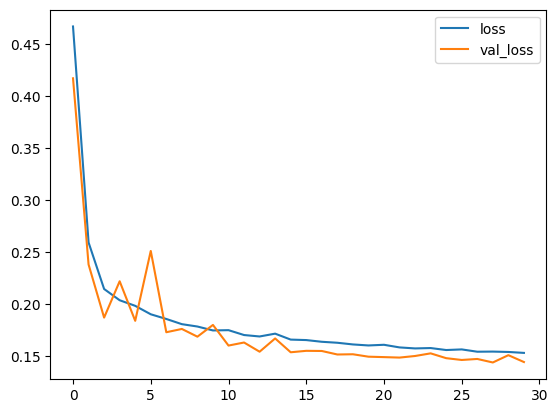

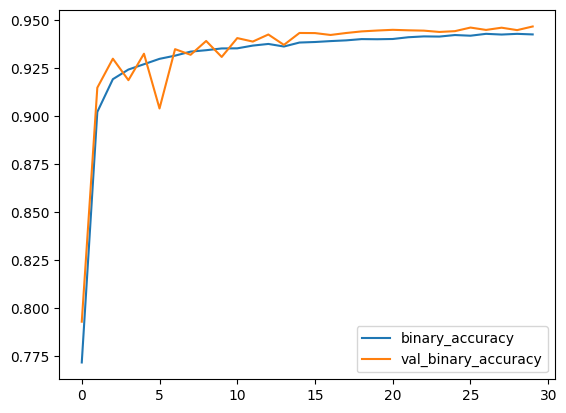

In [95]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 0
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

2206/2206 [==============================] - 12s 5ms/step


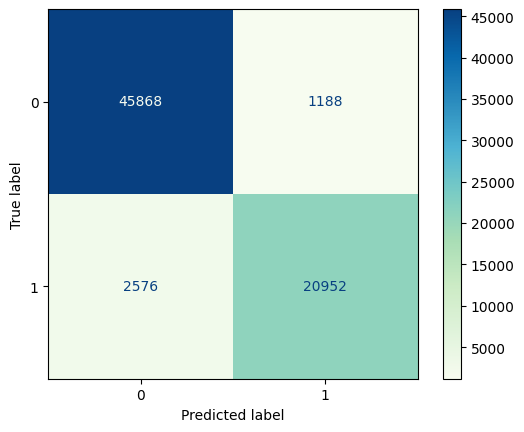

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# from sklearn.metrics import plot_confusion_matrix
y_pred=model.predict(X_valid)
y_pred=y_pred.reshape([y_pred.shape[0],])
y_pred=np.where(y_pred>0.5,1,0)
cm = confusion_matrix(y_valid, y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(cmap='GnBu')

In [97]:

def model_acc_func(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred=y_pred.reshape([y_pred.shape[0],])
    y_pred=np.where(y_pred>0.5,1,0)
    acc = accuracy_score(y_pred, y_test)
    print('Test Accuracy : \033[32m \033[01m {:.5f}% \033[30m \033[0m'.format(acc*100))
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    return model, acc

2206/2206 [==============================] - 11s 5ms/step
Test Accuracy :   94.03548%  
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     47056
           1       0.93      0.89      0.91     23528

    accuracy                           0.94     70584
   macro avg       0.94      0.93      0.93     70584
weighted avg       0.94      0.94      0.94     70584



(<keras.engine.sequential.Sequential at 0x7f8145fc7970>, 0.9403547546186104)

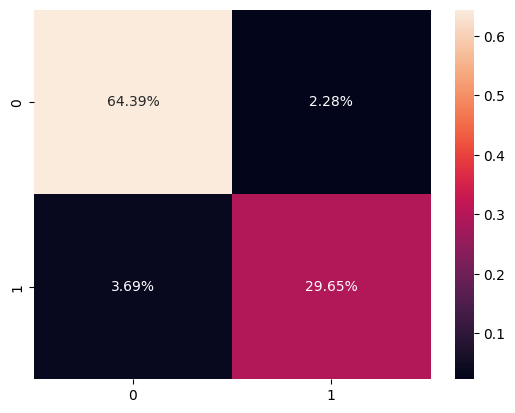

In [98]:
model_acc_func(model, X_train, y_train, X_valid, y_valid)

SVM

In [99]:
ben=df[df['type_code']==0].head(30000)
phis=df[df['type_code']==1].head(40000)
ben.shape,phis.shape

((30000, 22), (40000, 22))

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
fin_data=pd.concat([ben,phis])

fin_data.head()

,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,...,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count-digits,count-letters,type_code
0,0,0,1,0,0,4,0,0,0,0,...,0,0,61,0,0,5,-1,11,41,0
1,0,0,1,0,0,3,0,0,0,0,...,0,0,20,0,0,4,-1,0,16,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,20,0,0,8,-1,0,18,0
3,0,0,1,0,0,1,0,1,0,0,...,0,0,18,0,0,8,-1,0,16,0
4,0,0,2,0,0,2,0,0,0,0,...,1,0,35,0,0,9,-1,3,27,0


In [102]:
X=fin_data
y=X.pop('type_code')
X.shape,y.shape

((70000, 21), (70000,))

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((56000, 21), (14000, 21))

In [104]:
from sklearn.metrics import accuracy_score
SVM_Model = []
acc_train = []
acc_test = []
def storeResults(model, a,b):
  SVM_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [105]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=12)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [106]:
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.967
SVM : Accuracy on test Data: 0.968


In [ ]:
from sklearn.metrics import  confusion_matrix
confusion_matrix(y_test,y_test_svm)

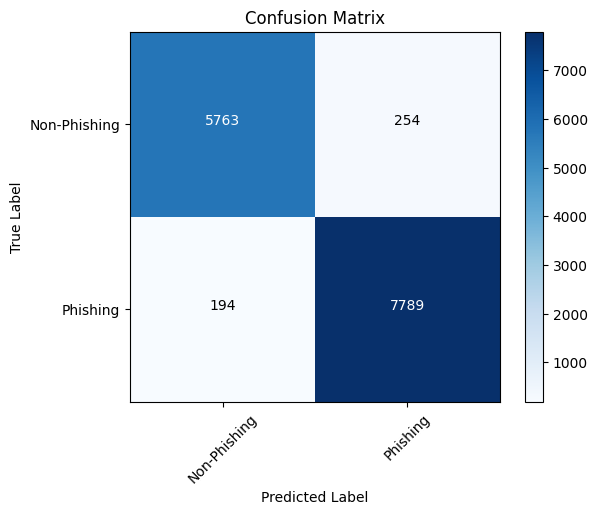

In [107]:
conf_mat = confusion_matrix(y_test,y_test_svm)
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(set(y_test)))
plt.xticks(tick_marks, ['Non-Phishing', 'Phishing'], rotation=45)
plt.yticks(tick_marks, ['Non-Phishing', 'Phishing'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = conf_mat.max() / 2
for i, j in np.ndindex(conf_mat.shape):
    plt.text(j, i, conf_mat[i, j], horizontalalignment="center", color="white" if conf_mat[i, j] > thresh else "black")

plt.show()